# Program-1: Traffic Monitoring System - Edge Detection Analysis




Image shape: (720, 1280)


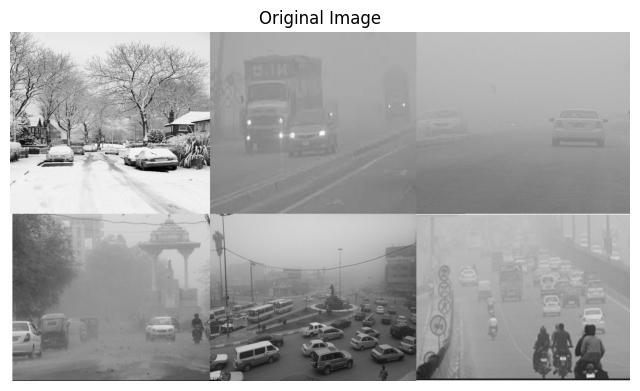

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy.ndimage import gaussian_filter

# Set up matplotlib
plt.rcParams['figure.figsize'] = (15, 10)

# Load the image
img = cv2.imread('prog1.jpg', cv2.IMREAD_GRAYSCALE)
img_color = cv2.imread('prog1.jpg')
img_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)

print(f"Image shape: {img.shape}")
plt.figure(figsize=(8, 6))
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

## 1. Sobel Edge Detection 


In [ ]:
# User-defined Sobel function
def sobel_edge_detection(image):
    # Sobel kernels
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    
    # Apply convolution
    edge_x = ndimage.convolve(image.astype(float), sobel_x)
    edge_y = ndimage.convolve(image.astype(float), sobel_y)
    
    # Magnitude
    edge_magnitude = np.sqrt(edge_x**2 + edge_y**2)
    edge_magnitude = (edge_magnitude / edge_magnitude.max() * 255).astype(np.uint8)
    
    return edge_x, edge_y, edge_magnitude

# User-defined 
sobel_x_user, sobel_y_user, sobel_mag_user = sobel_edge_detection(img)

# Built-in 
sobel_x_builtin = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y_builtin = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel_mag_builtin = cv2.magnitude(sobel_x_builtin, sobel_y_builtin)



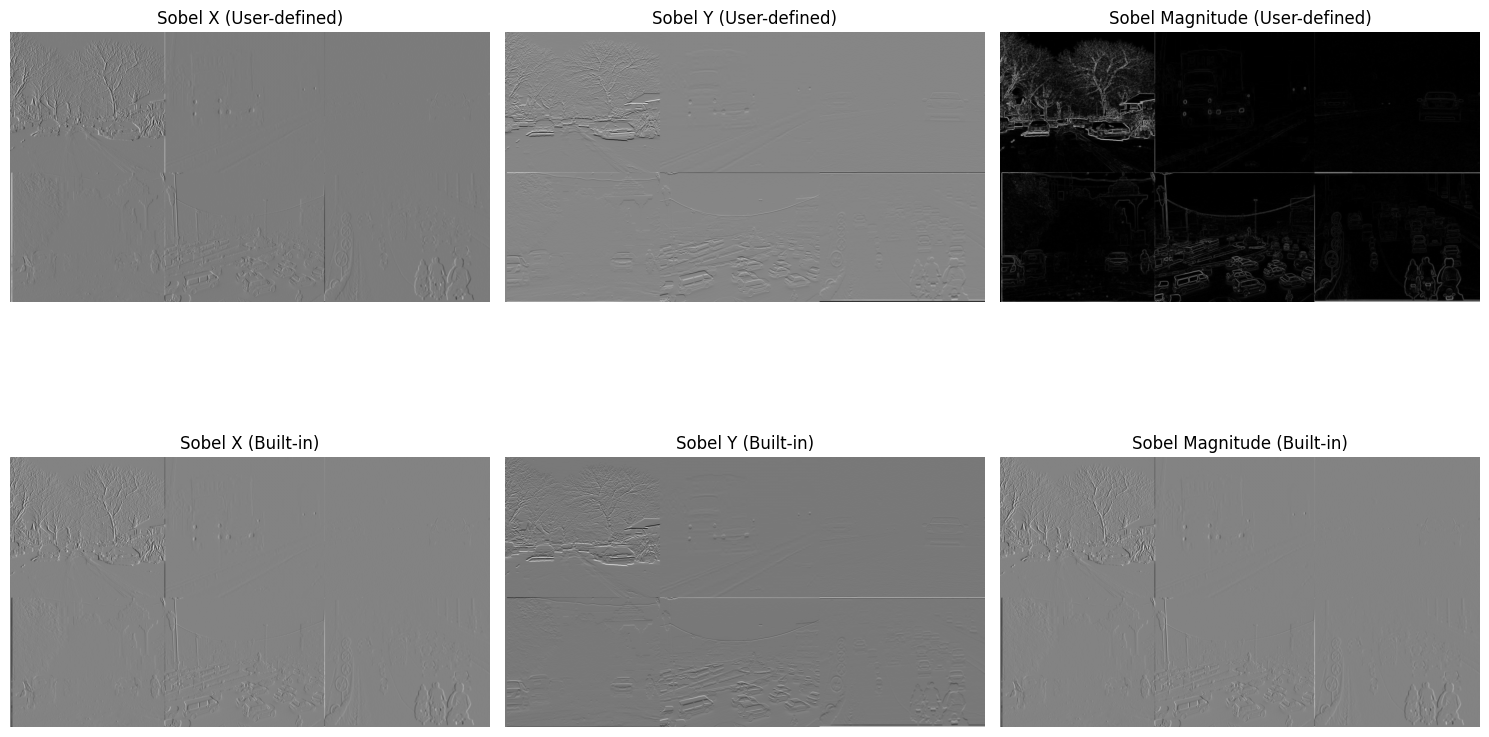

In [52]:
# Visualization
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes[0, 0].imshow(sobel_x_user, cmap='gray')
axes[0, 0].set_title('Sobel X (User-defined)')
axes[0, 1].imshow(sobel_y_user, cmap='gray')
axes[0, 1].set_title('Sobel Y (User-defined)')
axes[0, 2].imshow(sobel_mag_user, cmap='gray')
axes[0, 2].set_title('Sobel Magnitude (User-defined)')

axes[1, 0].imshow(sobel_x_builtin, cmap='gray')
axes[1, 0].set_title('Sobel X (Built-in)')
axes[1, 1].imshow(sobel_y_builtin, cmap='gray')
axes[1, 1].set_title('Sobel Y (Built-in)')
axes[1, 2].imshow(sobel_mag_builtin, cmap='gray')
axes[1, 2].set_title('Sobel Magnitude (Built-in)')

for ax in axes.flat:
    ax.axis('off')
plt.tight_layout()
plt.show()

## 2. Prewitt Edge Detection 


In [39]:
# User-defined Prewitt function
def prewitt_edge_detection(image):
    prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    prewitt_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
    
    edge_x = ndimage.convolve(image.astype(float), prewitt_x)
    edge_y = ndimage.convolve(image.astype(float), prewitt_y)
    edge_magnitude = np.sqrt(edge_x**2 + edge_y**2)
    edge_magnitude = (edge_magnitude / edge_magnitude.max() * 255).astype(np.uint8)
    
    return edge_x, edge_y, edge_magnitude

# User-defined Prewitt
prewitt_x_user, prewitt_y_user, prewitt_mag_user = prewitt_edge_detection(img)

# Built-in Prewitt 
prewitt_x_kernel = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype=np.float32)
prewitt_y_kernel = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]], dtype=np.float32)
prewitt_x_builtin = cv2.filter2D(img, -1, prewitt_x_kernel)
prewitt_y_builtin = cv2.filter2D(img, -1, prewitt_y_kernel)
prewitt_mag_builtin = np.sqrt(prewitt_x_builtin**2 + prewitt_y_builtin**2)




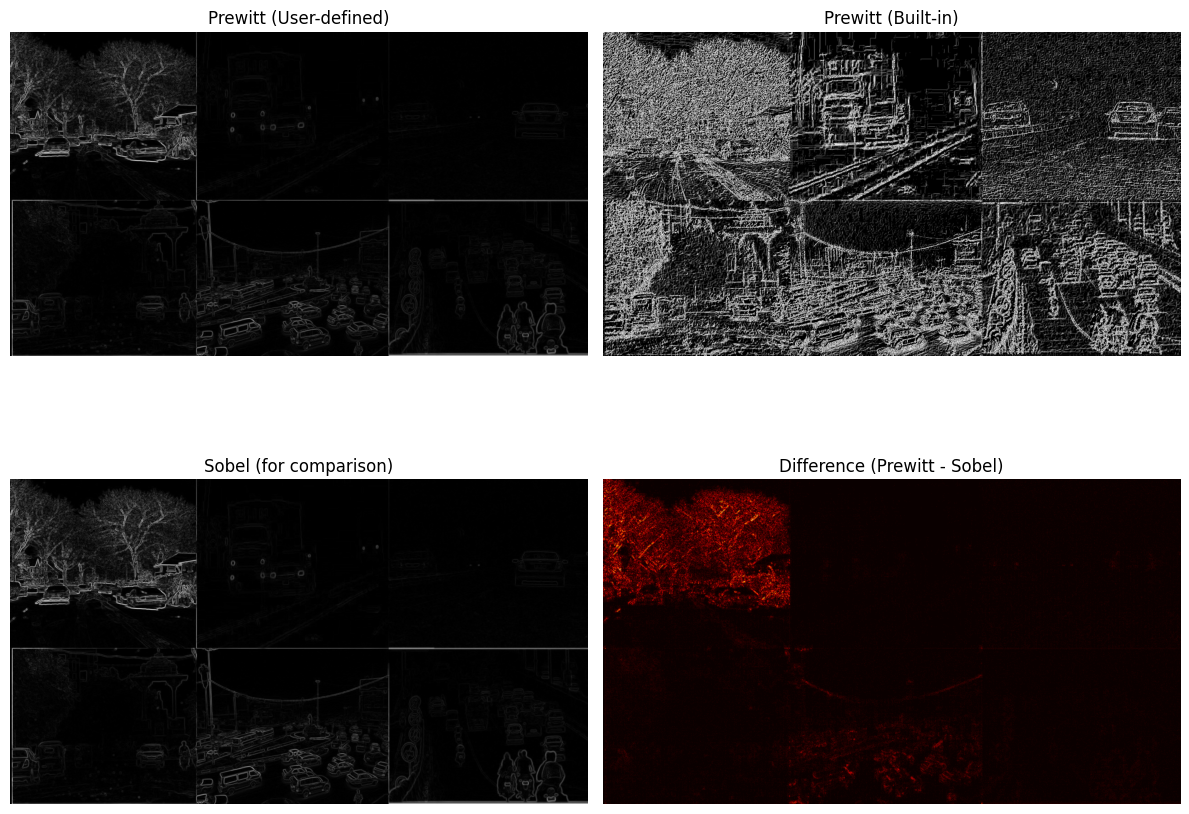

In [40]:

# Visualization


fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes[0, 0].imshow(prewitt_mag_user, cmap='gray')
axes[0, 0].set_title('Prewitt (User-defined)')
axes[0, 1].imshow(prewitt_mag_builtin, cmap='gray')
axes[0, 1].set_title('Prewitt (Built-in)')
axes[1, 0].imshow(sobel_mag_user, cmap='gray')
axes[1, 0].set_title('Sobel (for comparison)')
axes[1, 1].imshow(np.abs(prewitt_mag_user.astype(float) - sobel_mag_user.astype(float)), cmap='hot')
axes[1, 1].set_title('Difference (Prewitt - Sobel)')

for ax in axes.flat:
    ax.axis('off')
plt.tight_layout()
plt.show()


### Comparison: Prewitt vs Sobel
- Prewitt uses equal weights (1,1,1) while Sobel uses (1,2,1)
- Sobel gives more weight to center pixels
- Prewitt is simpler and faster but more sensitive to noise
- Both detect edges, Sobel produces smoother result

## 3. Roberts Operator 


In [41]:
# User-defined Roberts function
def roberts_edge_detection(image):
    roberts_x = np.array([[1, 0], [0, -1]])
    roberts_y = np.array([[0, 1], [-1, 0]])
    
    edge_x = ndimage.convolve(image.astype(float), roberts_x)
    edge_y = ndimage.convolve(image.astype(float), roberts_y)
    edge_magnitude = np.sqrt(edge_x**2 + edge_y**2)
    edge_magnitude = (edge_magnitude / edge_magnitude.max() * 255).astype(np.uint8)
    
    return edge_x, edge_y, edge_magnitude

# User-defined 
roberts_x_user, roberts_y_user, roberts_mag_user = roberts_edge_detection(img)

# Built-in 
roberts_x_kernel = np.array([[1, 0], [0, -1]], dtype=np.float32)
roberts_y_kernel = np.array([[0, 1], [-1, 0]], dtype=np.float32)
roberts_x_builtin = cv2.filter2D(img, -1, roberts_x_kernel)
roberts_y_builtin = cv2.filter2D(img, -1, roberts_y_kernel)
roberts_mag_builtin = np.sqrt(roberts_x_builtin**2 + roberts_y_builtin**2)


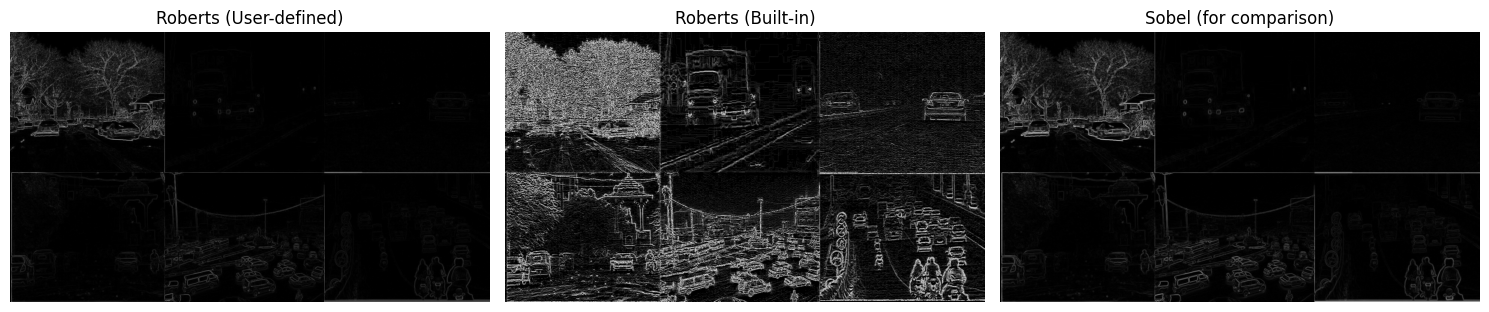

In [42]:
# Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(roberts_mag_user, cmap='gray')
axes[0].set_title('Roberts (User-defined)')
axes[1].imshow(roberts_mag_builtin, cmap='gray')
axes[1].set_title('Roberts (Built-in)')
axes[2].imshow(sobel_mag_user, cmap='gray')
axes[2].set_title('Sobel (for comparison)')

for ax in axes:
    ax.axis('off')
plt.tight_layout()
plt.show()


### Limitations for Satellite Images:
1. Small 2x2 kernel so is very sensitive to noise
2. Poor noise suppression
3. Detects only diagonal edges well and misses horizontal/vertical features
4. No smoothing as it amplifies high-frequency noise in satellite imagery
5. Weak edges may be lost- low contrast features in satellite images

In [43]:
# User-defined Laplacian function
def laplacian_edge_detection(image):
    # Standard Laplacian kernel
    laplacian_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
    
    edge = ndimage.convolve(image.astype(float), laplacian_kernel)
    edge = np.abs(edge)
    edge = (edge / edge.max() * 255).astype(np.uint8)
    
    return edge

# User-defined 
laplacian_user = laplacian_edge_detection(img)

# Built-in 
laplacian_builtin = cv2.Laplacian(img, cv2.CV_64F)
laplacian_builtin = np.abs(laplacian_builtin)
laplacian_builtin = (laplacian_builtin / laplacian_builtin.max() * 255).astype(np.uint8)

In [44]:

# Laplacian of Gaussian (LoG)
img_blur = gaussian_filter(img.astype(float), sigma=2)
log_result = laplacian_edge_detection(img_blur)

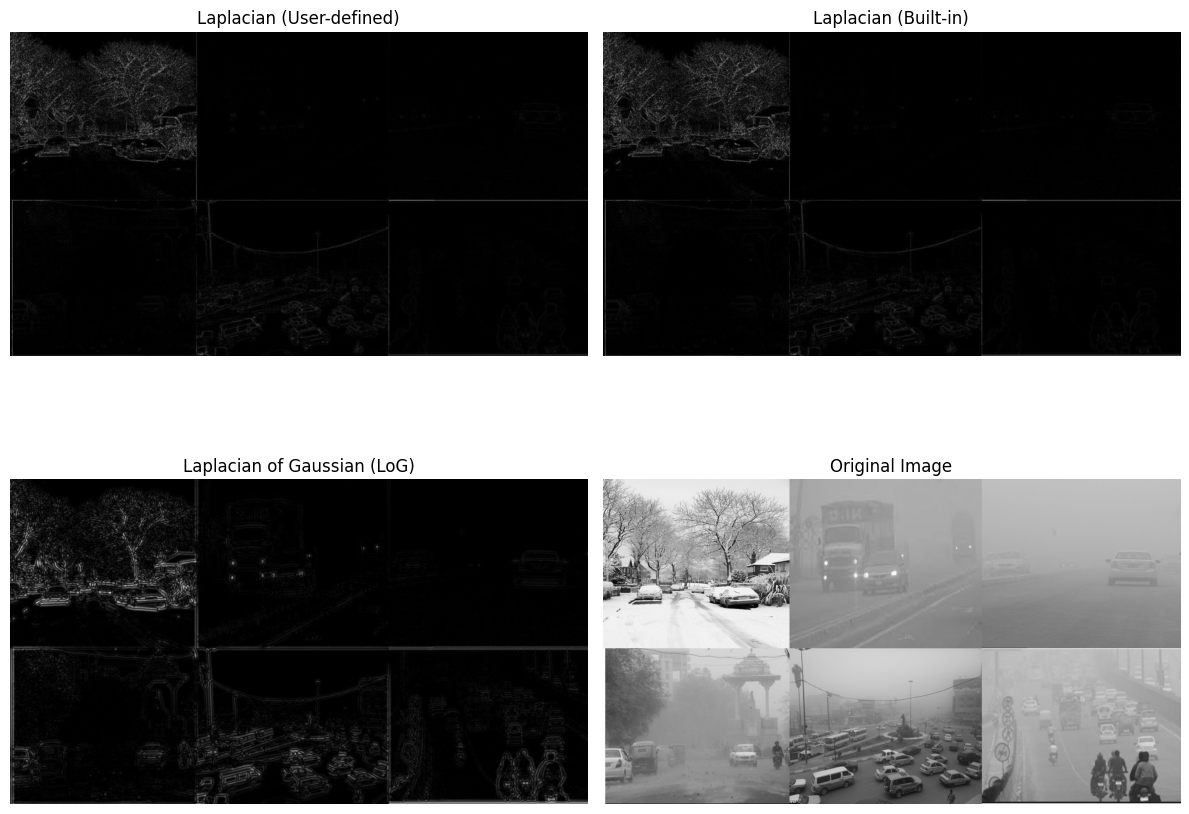

In [45]:

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes[0, 0].imshow(laplacian_user, cmap='gray')
axes[0, 0].set_title('Laplacian (User-defined)')
axes[0, 1].imshow(laplacian_builtin, cmap='gray')
axes[0, 1].set_title('Laplacian (Built-in)')
axes[1, 0].imshow(log_result, cmap='gray')
axes[1, 0].set_title('Laplacian of Gaussian (LoG)')
axes[1, 1].imshow(img, cmap='gray')
axes[1, 1].set_title('Original Image')

for ax in axes.flat:
    ax.axis('off')
plt.tight_layout()
plt.show()

## 5. Canny Edge Detection 

In [ ]:
# User-defined Canny function
def canny_edge_detection(image, low_threshold=50, high_threshold=150):
    # Step 1: Gaussian smoothing
    blurred = gaussian_filter(image.astype(float), sigma=1.4)
    
    # Step 2: Gradient calculation
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    
    grad_x = ndimage.convolve(blurred, sobel_x)
    grad_y = ndimage.convolve(blurred, sobel_y)
    
    magnitude = np.sqrt(grad_x**2 + grad_y**2)
    angle = np.arctan2(grad_y, grad_x) * 180 / np.pi
    angle[angle < 0] += 180
    
    # Step 3: Non-maximum suppression
    nms = np.zeros_like(magnitude)
    for i in range(1, magnitude.shape[0] - 1):
        for j in range(1, magnitude.shape[1] - 1):
            q, r = 255, 255
            # Angle quantization
            if (0 <= angle[i, j] < 22) or (157 <= angle[i, j] <= 180):
                q = magnitude[i, j+1]
                r = magnitude[i, j-1]
            elif 22 <= angle[i, j] < 66:
                q = magnitude[i+1, j-1]
                r = magnitude[i-1, j+1]
            elif 66 <= angle[i, j] < 112:
                q = magnitude[i+1, j]
                r = magnitude[i-1, j]
            elif 112 <= angle[i, j] < 157:
                q = magnitude[i-1, j-1]
                r = magnitude[i+1, j+1]
            
            if magnitude[i, j] >= q and magnitude[i, j] >= r:
                nms[i, j] = magnitude[i, j]
    
    # Step 4: Double thresholding
    strong = nms > high_threshold
    weak = (nms >= low_threshold) & (nms <= high_threshold)
    
    # Step 5: Edge tracking by hysteresis
    edges = strong.astype(np.uint8) * 255
    
    return edges, magnitude, nms

# User-defined Canny
canny_user, magnitude, nms = canny_edge_detection(img, 50, 150)

# Built-in Canny
canny_builtin = cv2.Canny(img, 50, 150)


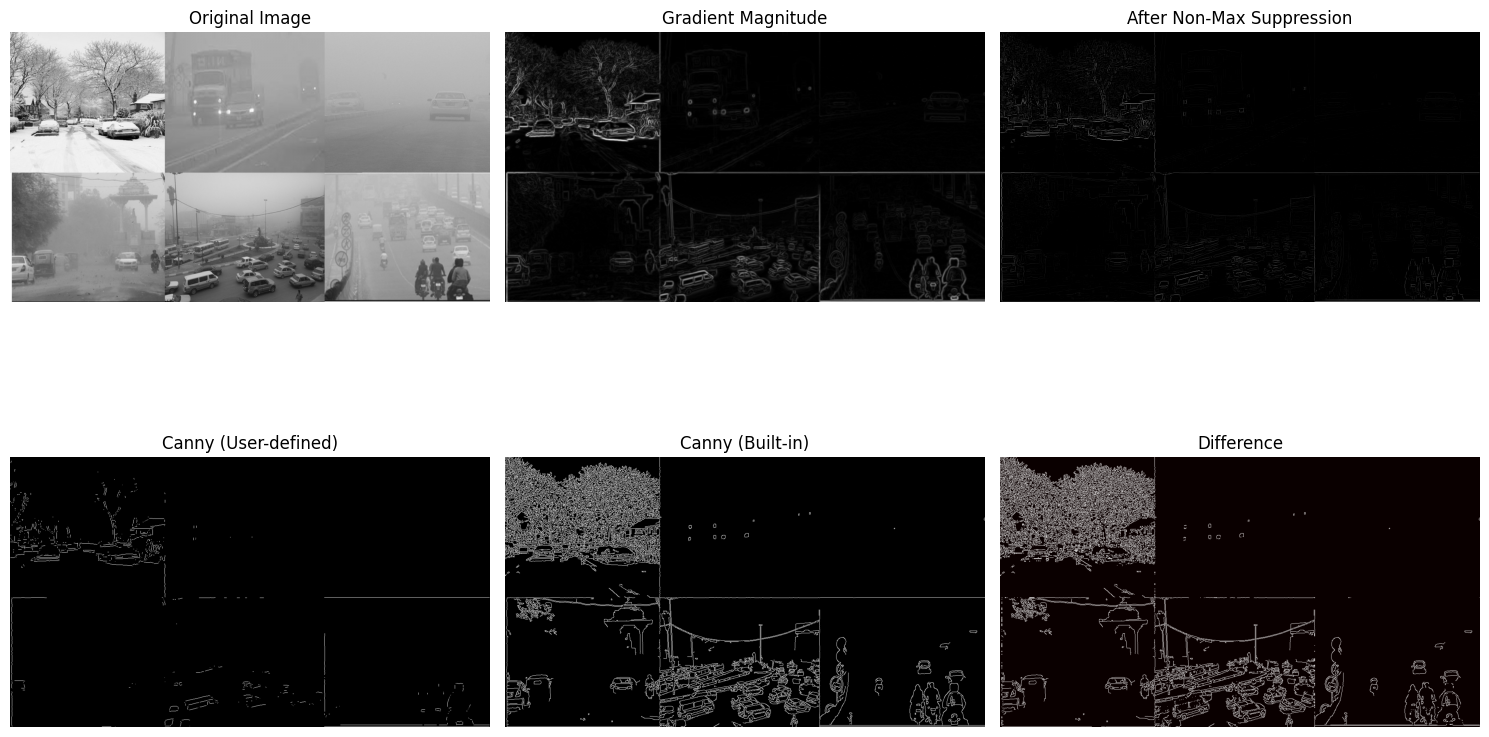

In [47]:

# Visualization
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes[0, 0].imshow(img, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 1].imshow(magnitude, cmap='gray')
axes[0, 1].set_title('Gradient Magnitude')
axes[0, 2].imshow(nms, cmap='gray')
axes[0, 2].set_title('After Non-Max Suppression')
axes[1, 0].imshow(canny_user, cmap='gray')
axes[1, 0].set_title('Canny (User-defined)')
axes[1, 1].imshow(canny_builtin, cmap='gray')
axes[1, 1].set_title('Canny (Built-in)')
axes[1, 2].imshow(np.abs(canny_user.astype(float) - canny_builtin.astype(float)), cmap='hot')
axes[1, 2].set_title('Difference')

for ax in axes.flat:
    ax.axis('off')
plt.tight_layout()
plt.show()

### 6. Sobel Operator under Varying Lighting 

The Sobel operator performs **moderately well** under varying lighting conditions:
-  Gradient-based approach is relatively robust to uniform lighting changes
-  Struggles with shadows and extreme contrast variations and different lighting conditions


### 7. Prewitt for Smooth Edges of Moving Vehicles 

Prewitt operator is **moderately effective** for moving vehicles:
- Simple and fast, suitable for real-time processing
- Equal weighting makes it more noise-sensitive than Sobel


### 8. Canny Multi-Stage Process Benefits 

Canny's multi-stage process reduces false detections through:
1. Removes noise before edge detection
2. Thins edges to single-pixel width, eliminating weak responses
3. Separates strong, weak, and non-edges
4. Connects weak edges only if linked to strong edges, reducing isolated noise pixels

**Result**: Clean, continuous edges with minimal false positives

### 9. Laplacian of Gaussian (LoG) for Blurred Edges 

LoG handles blurred edges effectively:
- Smooths the image first, reducing noise and motion blur effects
- Allows detection at different blur levels
- Excellent for low-visibility conditions (fog, rain) in traffic monitoring

### 10. Roberts Operator for Real-Time Detection 

Roberts is **not suitable** for real-time detection:
- **Pros**: 
  - Very fast (2×2 kernel, minimal computation)
  - Low memory footprint
- **Cons**:
  - High noise sensitivity 
  - Poor edge localization
  - Misses non-diagonal edges
- **Verdict**: Not recommended for production traffic monitoring; Sobel or simplified Canny preferred for real-time with better accuracy